In [22]:
# 폰트 설정# 1) 나눔 글꼴 설치
!apt-get -qq update
!apt-get -qq install fonts-nanum

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [23]:
# 2) matplotlib 폰트 캐시 삭제 (중요)
import shutil, os
shutil.rmtree(os.path.expanduser("~/.cache/matplotlib"), ignore_errors=True)

In [24]:
# 3) 폰트 수동 등록 + 기본 폰트로 지정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=12)
fm.fontManager.addfont(font_path)              # 새 폰트를 매니저에 등록
rcParams["font.family"] = "NanumGothic"        # 기본 폰트로 지정
rcParams["axes.unicode_minus"] = False         # 음수기호 깨짐 방지

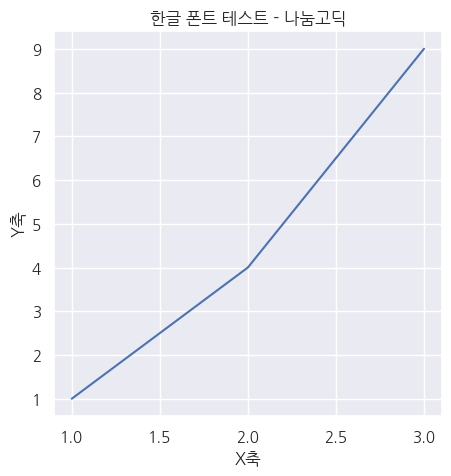

In [25]:
# 4) 테스트
plt.plot([1,2,3],[1,4,9])
plt.title("한글 폰트 테스트 - 나눔고딕")
plt.xlabel("X축")
plt.ylabel("Y축")
plt.show()

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('crimeRatesByState2005.csv')
df.head()

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
0,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049
1,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488
2,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834
3,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221
4,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,35795255


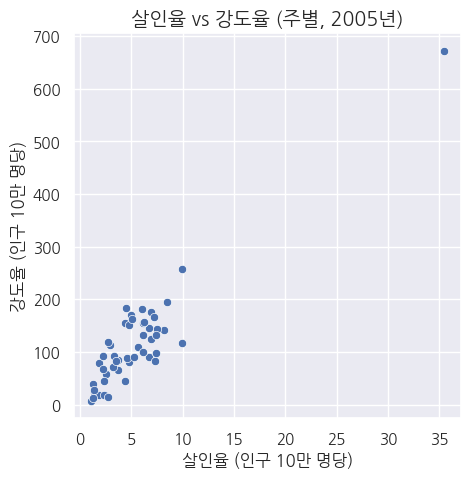

In [28]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df, x="murder", y="robbery")

plt.title("살인율 vs 강도율 (주별, 2005년)", fontsize=14)
plt.xlabel("살인율 (인구 10만 명당)", fontsize=12)
plt.ylabel("강도율 (인구 10만 명당)", fontsize=12)
plt.show()

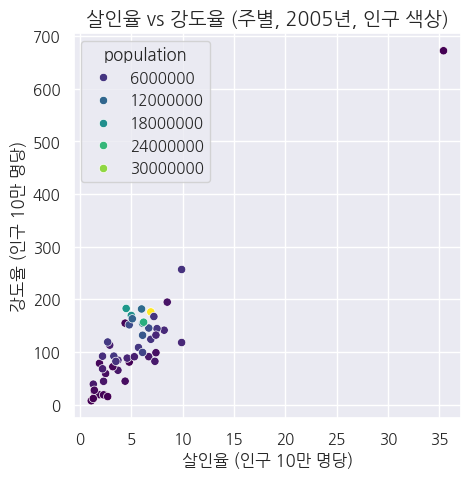

In [29]:
plt.figure(figsize=(5,5))
sns.scatterplot(
    data=df,
    x="murder",
    y="robbery",
    hue="population",      # 인구에 따라 색상 구분
    palette="viridis"      # 색상 팔레트 (viridis = 진보라 ~ 노랑)
)

plt.title("살인율 vs 강도율 (주별, 2005년, 인구 색상)", fontsize=14)
plt.xlabel("살인율 (인구 10만 명당)", fontsize=12)
plt.ylabel("강도율 (인구 10만 명당)", fontsize=12)
plt.colorbar = plt.colorbar  # 컬러바 표시
plt.show()

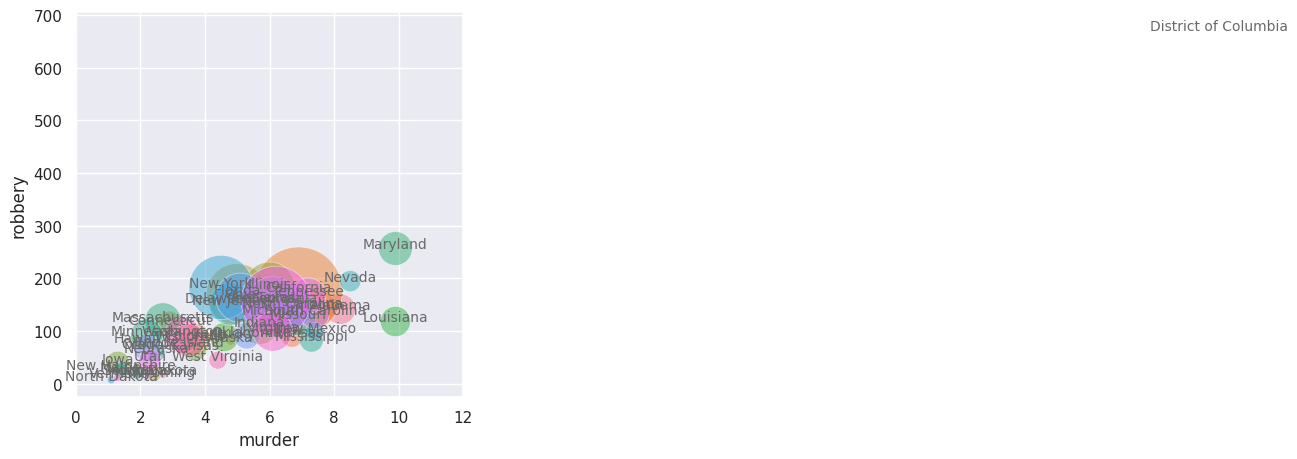

In [31]:
# 버블 차트
sns.set_theme(rc={'figure.figsize': (5, 5)})

sns.scatterplot(
    data=df,
    x="murder",  # x축
    y="robbery",  # y축
    size="population",  # 원의 크기 #동그라미 사이즈를 population에 맞게
    sizes=(20, 4000),  # 원의 크기 범위
    hue="state",  # 원의 색
    alpha=0.5,  # 투명도
    legend=False  # 범례 표시 여부
)
plt.xlim(0, 12)  # x축 값의 범위

# 주 이름을 버블 위에 표시
for i in range(0, df.shape[0]):
    plt.text(x=df.murder[i], y=df.robbery[i], s=df.state[i],
         horizontalalignment='center', size='small', color='dimgray')
plt.show()


In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

plt.rcParams['font.family'] = 'NanumGothic'  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# 데이터 준비
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
dict1 = {0: '사망', 1: '생존'}
dict2 = {'male': '남성', 'female': '여성'}
df = df.replace({'survived': dict1})
df = df.replace({'sex': dict2})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,사망,3,남성,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,생존,1,여성,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,생존,3,여성,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,생존,1,여성,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,사망,3,남성,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 그래프 설정
def props(key):
       return {'color': 'lightgreen' if '생존' in key else 'yellow'}

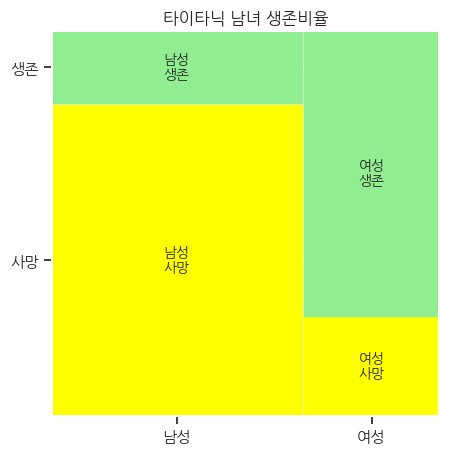

In [ ]:
# 그래프 작성
mosaic(data=df.sort_values('sex'),
       index=['sex', 'survived'],
       properties=props,  # 타일 색상 변경
       axes_label=True,  # 축 레이블 표시
       title='타이타닉 남녀 생존비율'  # 그래프 제목
       )

plt.show()
#모자이크 플롯은 x축 y축 둘다 범주형 변수

In [ ]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
# 피벗 테이블 생성 (중요: 내가 원하는 변수들로만 테이블 만들기)
df = flights.pivot_table(index='month',  # 행 위치에 들어갈 컬럼
                         columns='year',  # 열 위치에 들어갈 컬럼
                         values='passengers',  # 데이터로 사용할 컬럼
                         aggfunc='mean'  # 데이터 집계함수
                         )
df.head(12)

/tmp/ipython-input-326207071.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df = flights.pivot_table(index='month',  # 행 위치에 들어갈 컬럼


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


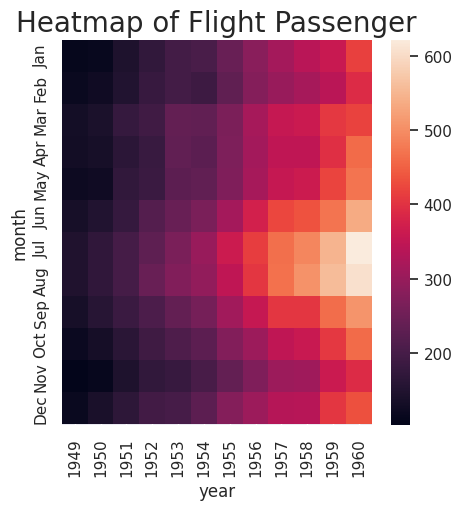

In [ ]:
# 히트맵 작성
sns.set_theme(rc={'figure.figsize': (5, 5)})
sns.heatmap(df).set_title('Heatmap of Flight Passenger', fontsize=20)
plt.show()

In [ ]:
import plotly.express as px
import webbrowser
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('GNI2014.csv')
df.head()

,iso3,country,continent,population,GNI
0,BMU,Bermuda,North America,67837,106140
1,NOR,Norway,Europe,4676305,103630
2,QAT,Qatar,Asia,833285,92200
3,CHE,Switzerland,Europe,7604467,88120
4,MAC,"Macao SAR, China",Asia,559846,76270


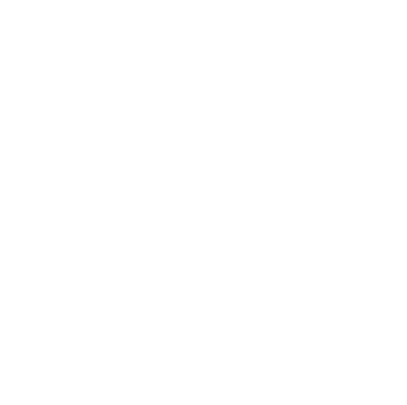

In [ ]:
fig = px.treemap(data_frame=df,
                 path=['continent', 'iso3'],  # 데이터의 계층 구조
                 values='population',  # 타일 면적 기준 컬럼
                 color='GNI',  # 색 온도 기준 컬럼
                 color_continuous_scale='Bluyl'  # 컬러 팔레트
                 )

plt.axis('off')  # 축 눈금 제거
fig.update_layout(margin_t=50, margin_l=25,  # 여백 설정
                  margin_r=25, margin_b=25,
                  width=800,  # 그래프의 폭(pixel)
                  height=600,  # 그래프의 높이(pixel)
                  title_text='GNI 2014',  # 그래프 제목
                  title_font_size=20  # 제목 폰트 크기
                  )

# 그래프 저장 & 화면에 표시하기
fig.write_html('treemap.html')  # html 파일로 결과 저장